 ## Assigmen 3
 
 Using Pandas and Statsmodels write a Jupyter Notebook that: 



1.Uses the data from the Maddison Project to plot the evolution of total population across the world. 

In [1]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [3]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [4]:
maddison_new['year'] = maddison_new.year.astype(int)
maddison_new

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN
...,...,...,...,...,...,...,...,...
19868,ZWE,Zimbabwe,2012,1623.0,1604.0,12620.0,Extrapolated,NaN
19869,ZWE,Zimbabwe,2013,1801.0,1604.0,13183.0,Extrapolated,NaN
19870,ZWE,Zimbabwe,2014,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015,1759.0,1560.0,14230.0,Extrapolated,NaN


In [5]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')

In [6]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop

,Unnamed: 0,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,NaN,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,NaN,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,NaN,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,NaN,1025.217


In [7]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]

In [8]:
popwo = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('WORLD TOTAL')!=-1)].reset_index(drop=True)
popwo = popwo.dropna(subset=['pop_1'])
popwo = popwo.dropna(axis=1, how='any')

In [9]:
popwo

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,World Total,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [10]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()


In [11]:
popwo = pd.wide_to_long(popwo, ['pop_'], i='Country', j='year').reset_index()
popwo

,Country,year,pop_
0,World Total,1,225820
1,World Total,1000,267330
2,World Total,1500,438428
3,World Total,1600,556148
4,World Total,1700,603490
...,...,...,...
67,World Total,2006,6.54021e+06
68,World Total,2007,6.61669e+06
69,World Total,2008,6.69483e+06
70,World Total,2009,6764086


In [12]:
popwo2 = popwo.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum')
popwo2

Country,World Total
year,
1,2.258200e+05
1000,2.673300e+05
1500,4.384280e+05
1600,5.561480e+05
1700,6.034900e+05
...,...
2006,6.540214e+06
2007,6.616689e+06
2008,6.694832e+06


Text(0, 0.5, 'Total World population')

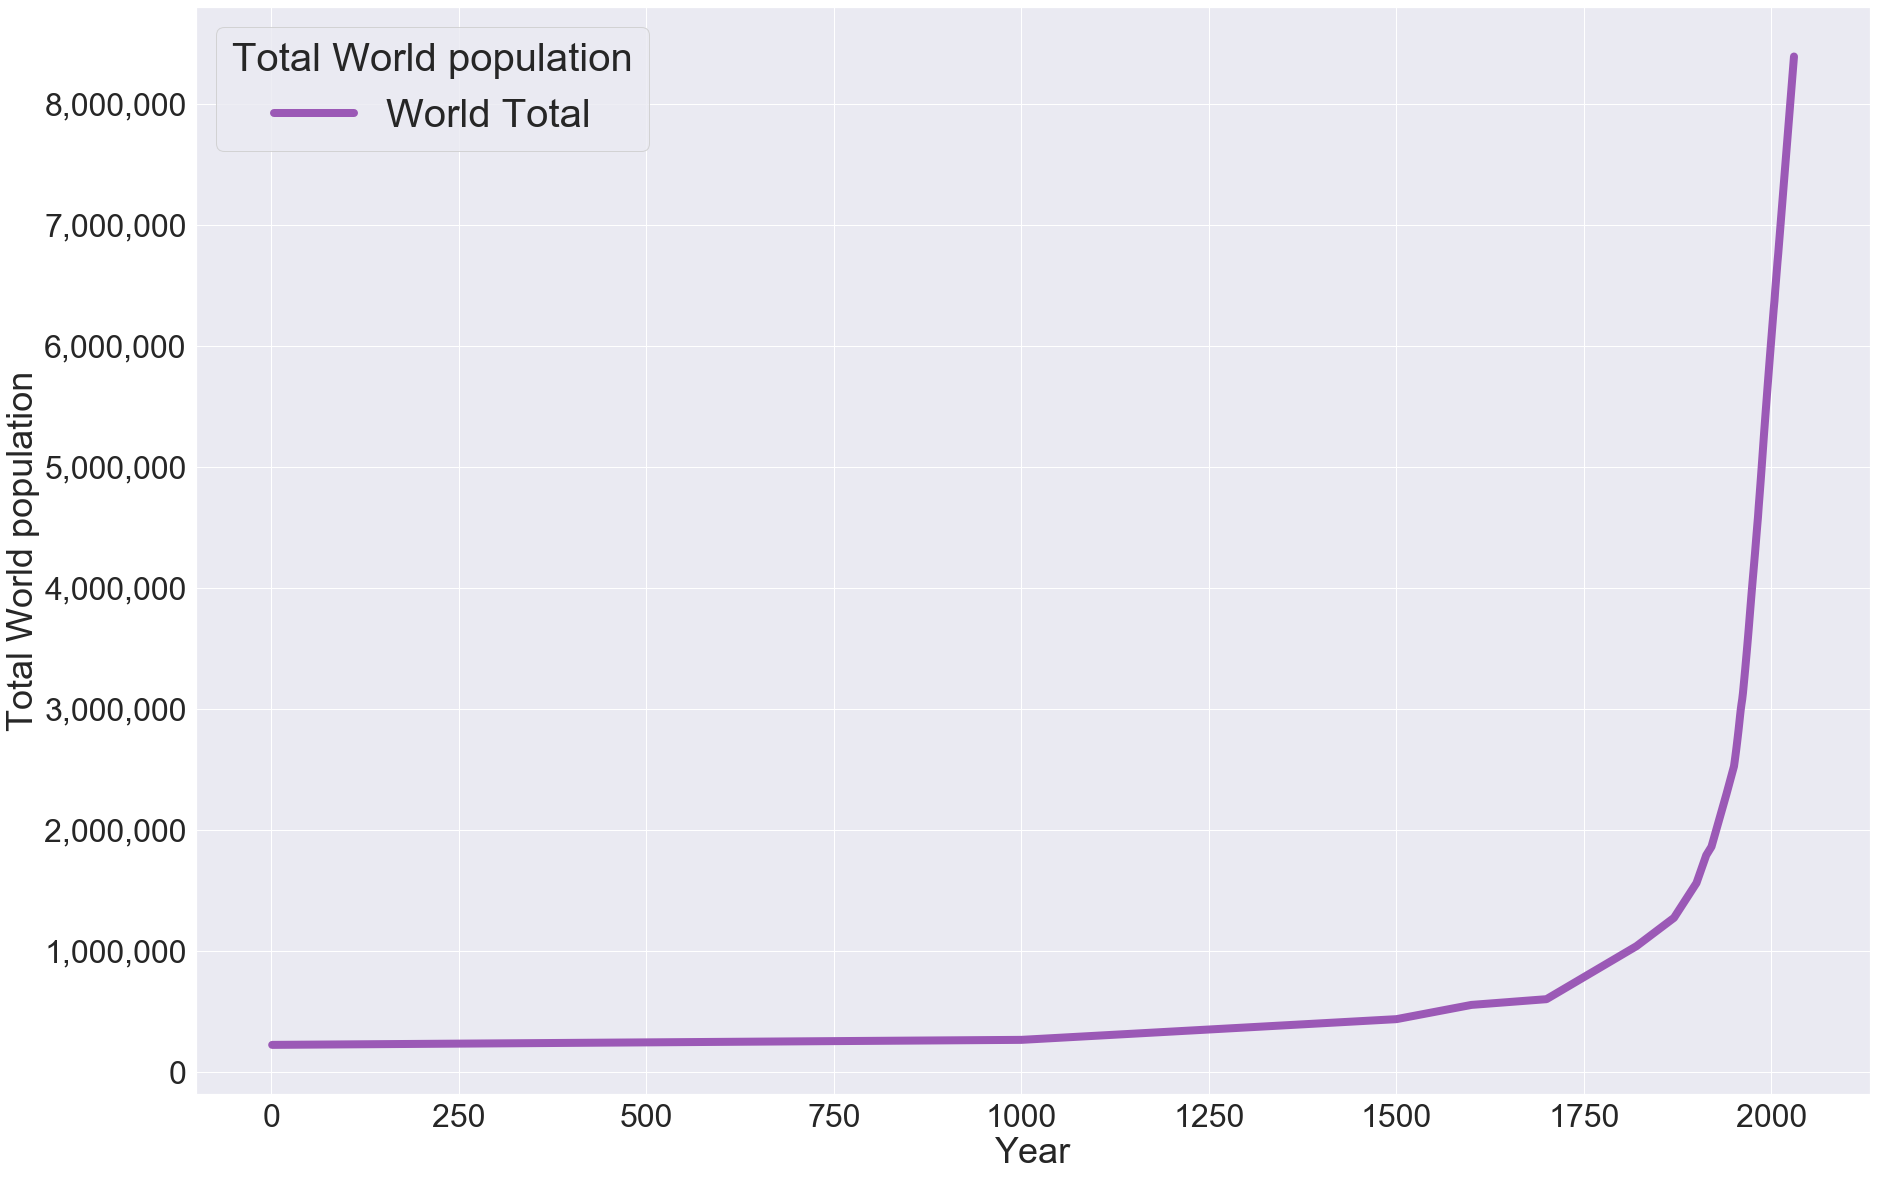

In [13]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

fig, ax = plt.subplots(figsize=(30,20))
popwo2.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Total World population", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Total World population', fontsize=36)

## 2 POINT
 Plots the evolution of the share of the world population by countries and WB regions.
## 2.B TOTAL BY REGION

In [14]:
if not os.path.exists(pathout + 'Datapopularionwb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Datapopularionwb.xls')

In [15]:
wb_old_pop = pd.read_excel(pathout + 'Datapopularionwb.xls', sheet_name="Data", skiprows=2)


In [16]:
wb_old_pop


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019.0
1,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,101669,102046,102560,103159,103774,104341,104872,105366,105845,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973,9169410,9351441,9543205,9744781,9956320,...,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386,NaN
3,Angola,AGO,"Population, total",SP.POP.TOTL,5454933,5531472,5608539,5679458,5735044,5770570,...,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762,NaN
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000,966000,994000,1022000,1050000,1078000,...,1775680,1791000,1805200,1824100,1821800,1801800,1816200,1830700,1845300,NaN
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355,5393036,5473671,5556766,5641597,5727751,...,23154855,23807588,24473178,25147109,25823485,26497889,27168210,27834821,28498687,NaN
256,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840,17524533,17965725,18423161,18896307,19384841,...,51216964,52004172,52834005,53689236,54545991,55386367,56203654,57000451,57779622,NaN
257,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776,3164329,3260650,3360104,3463213,3570464,...,13605984,14023193,14465121,14926504,15399753,15879361,16363507,16853688,17351822,NaN


wb_old_pop['Unnamed: 63']=wb_old_pop['Unnamed: 63'].astype('int')





wb_old_pop1[0]=wb_old_pop1[0].astype('int')


In [17]:
het = wb_old_pop.iloc[0]
wb_old_pop2 = pd.DataFrame(wb_old_pop.values[1:], columns=het)

In [18]:
wb_old_pop2=wb_old_pop2.drop(wb_old_pop2.columns[[1, 2, 3, 4,]], axis='columns')

In [19]:
wb_old_pop2= wb_old_pop2[[col for col in wb_old_pop2.columns if str(col).startswith('2019.0')==False]]
wb_old_pop2.rename(columns={'Country Name': 'Country', }, inplace=True)
wb_old_pop2.columns = ['Country'] + ['b'+str(col) for col in wb_old_pop2.columns[1:]]

In [20]:
wb_old_pop2

,Country,b1961,b1962,b1963,b1964,b1965,b1966,b1967,b1968,b1969,...,b2009,b2010,b2011,b2012,b2013,b2014,b2015,b2016,b2017,b2018
0,Aruba,55438,56225,56695,57032,57360,57715,58055,58386,58726,...,101455,101669,102046,102560,103159,103774,104341,104872,105366,105845
1,Afghanistan,9169410,9351441,9543205,9744781,9956320,10174836,10399926,10637063,10893776,...,28394813,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386
2,Angola,5531472,5608539,5679458,5735044,5770570,5781214,5774243,5771652,5803254,...,22514281,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762
3,Albania,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,2081695,...,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376
4,Andorra,14375,15370,16412,17469,18549,19647,20758,21890,23058,...,84463,84449,83747,82427,80774,79213,78011,77297,77001,77006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Kosovo,966000,994000,1022000,1050000,1078000,1106000,1135000,1163000,1191000,...,1761474,1775680,1791000,1805200,1824100,1821800,1801800,1816200,1830700,1845300
254,"Yemen, Rep.",5393036,5473671,5556766,5641597,5727751,5816247,5907874,6001852,6097035,...,22516460,23154855,23807588,24473178,25147109,25823485,26497889,27168210,27834821,28498687
255,South Africa,17524533,17965725,18423161,18896307,19384841,19888250,20406864,20942145,21496075,...,50477011,51216964,52004172,52834005,53689236,54545991,55386367,56203654,57000451,57779622
256,Zambia,3164329,3260650,3360104,3463213,3570464,3681955,3797873,3918872,4045740,...,13215139,13605984,14023193,14465121,14926504,15399753,15879361,16363507,16853688,17351822



wb_old_pop2.rename(columns={'Country Name': 'Country', }, inplace=True)
wb_old_pop2.columns = ['Country'] + ['b'+str(col) for col in wb_old_pop2.columns[1:]]

wb_old_pop2.dtypes


In [21]:
WBOLDR = wb_old_pop2[wb_old_pop2.Country.isin(['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
                                              ])] 
WBOLDR.head()

,Country,b1961,b1962,b1963,b1964,b1965,b1966,b1967,b1968,b1969,...,b2009,b2010,b2011,b2012,b2013,b2014,b2015,b2016,b2017,b2018
61,East Asia & Pacific,1044544622,1059018809,1084796352,1110214377,1136691455,1166600015,1195269923,1224531259,1257454897,...,2192059415,2206884624,2221673110,2236819053,2252046977,2267482299,2282855831,2298486142,2314097713,2328138066
63,Europe & Central Asia,674450648,682397793,690411689,698355562,706070485,712830280,719406036,725725288,731903703,...,884469337,887926760,890162680,893786649,898066267,902415636,906721013,910940725,914626123,917973802
129,Latin America & Caribbean,225993884,232265533,238696012,245233432,251850859,258538106,265295652,272128513,279037414,...,583746102,590303295,596966199,603586217,610151927,616619613,622986033,629240066,635372515,641357466
148,Middle East & North Africa,108061812,111045434,114101592,117271166,120541214,123908159,127444958,131026912,134704201,...,377883993,385917886,393944527,401974219,409977874,417932242,425821770,433597626,441255234,448912959
165,North America,202007500,205198600,208253700,211262900,214031100,216659000,219176000,221503000,223759000,...,340466060,343391679,345960766,348610010,351141670,353803582,356403310,359115353,361592734,363809239


In [22]:
WBOLDR2 = pd.wide_to_long(WBOLDR, ['b'], i='Country', j='year').reset_index()
WBOLDR2

,Country,year,b
0,East Asia & Pacific,1961,1044544622
1,Europe & Central Asia,1961,674450648
2,Latin America & Caribbean,1961,225993884
3,Middle East & North Africa,1961,108061812
4,North America,1961,202007500
...,...,...,...
285,East Asia & Pacific,2018,2328138066
286,Europe & Central Asia,2018,917973802
287,Latin America & Caribbean,2018,641357466
288,Middle East & North Africa,2018,448912959


In [23]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()


In [24]:
WBOLDR3 = WBOLDR2.pivot_table(index='year',columns='Country',values='b',aggfunc='sum')
WBOLDR3

Country,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America
year,,,,,
1961,1044544622,674450648,225993884,108061812,202007500
1962,1059018809,682397793,232265533,111045434,205198600
1963,1084796352,690411689,238696012,114101592,208253700
1964,1110214377,698355562,245233432,117271166,211262900
1965,1136691455,706070485,251850859,120541214,214031100
1966,1166600015,712830280,258538106,123908159,216659000
1967,1195269923,719406036,265295652,127444958,219176000
1968,1224531259,725725288,272128513,131026912,221503000
1969,1257454897,731903703,279037414,134704201,223759000


## graph by region

Text(0, 0.5, 'Total  population')

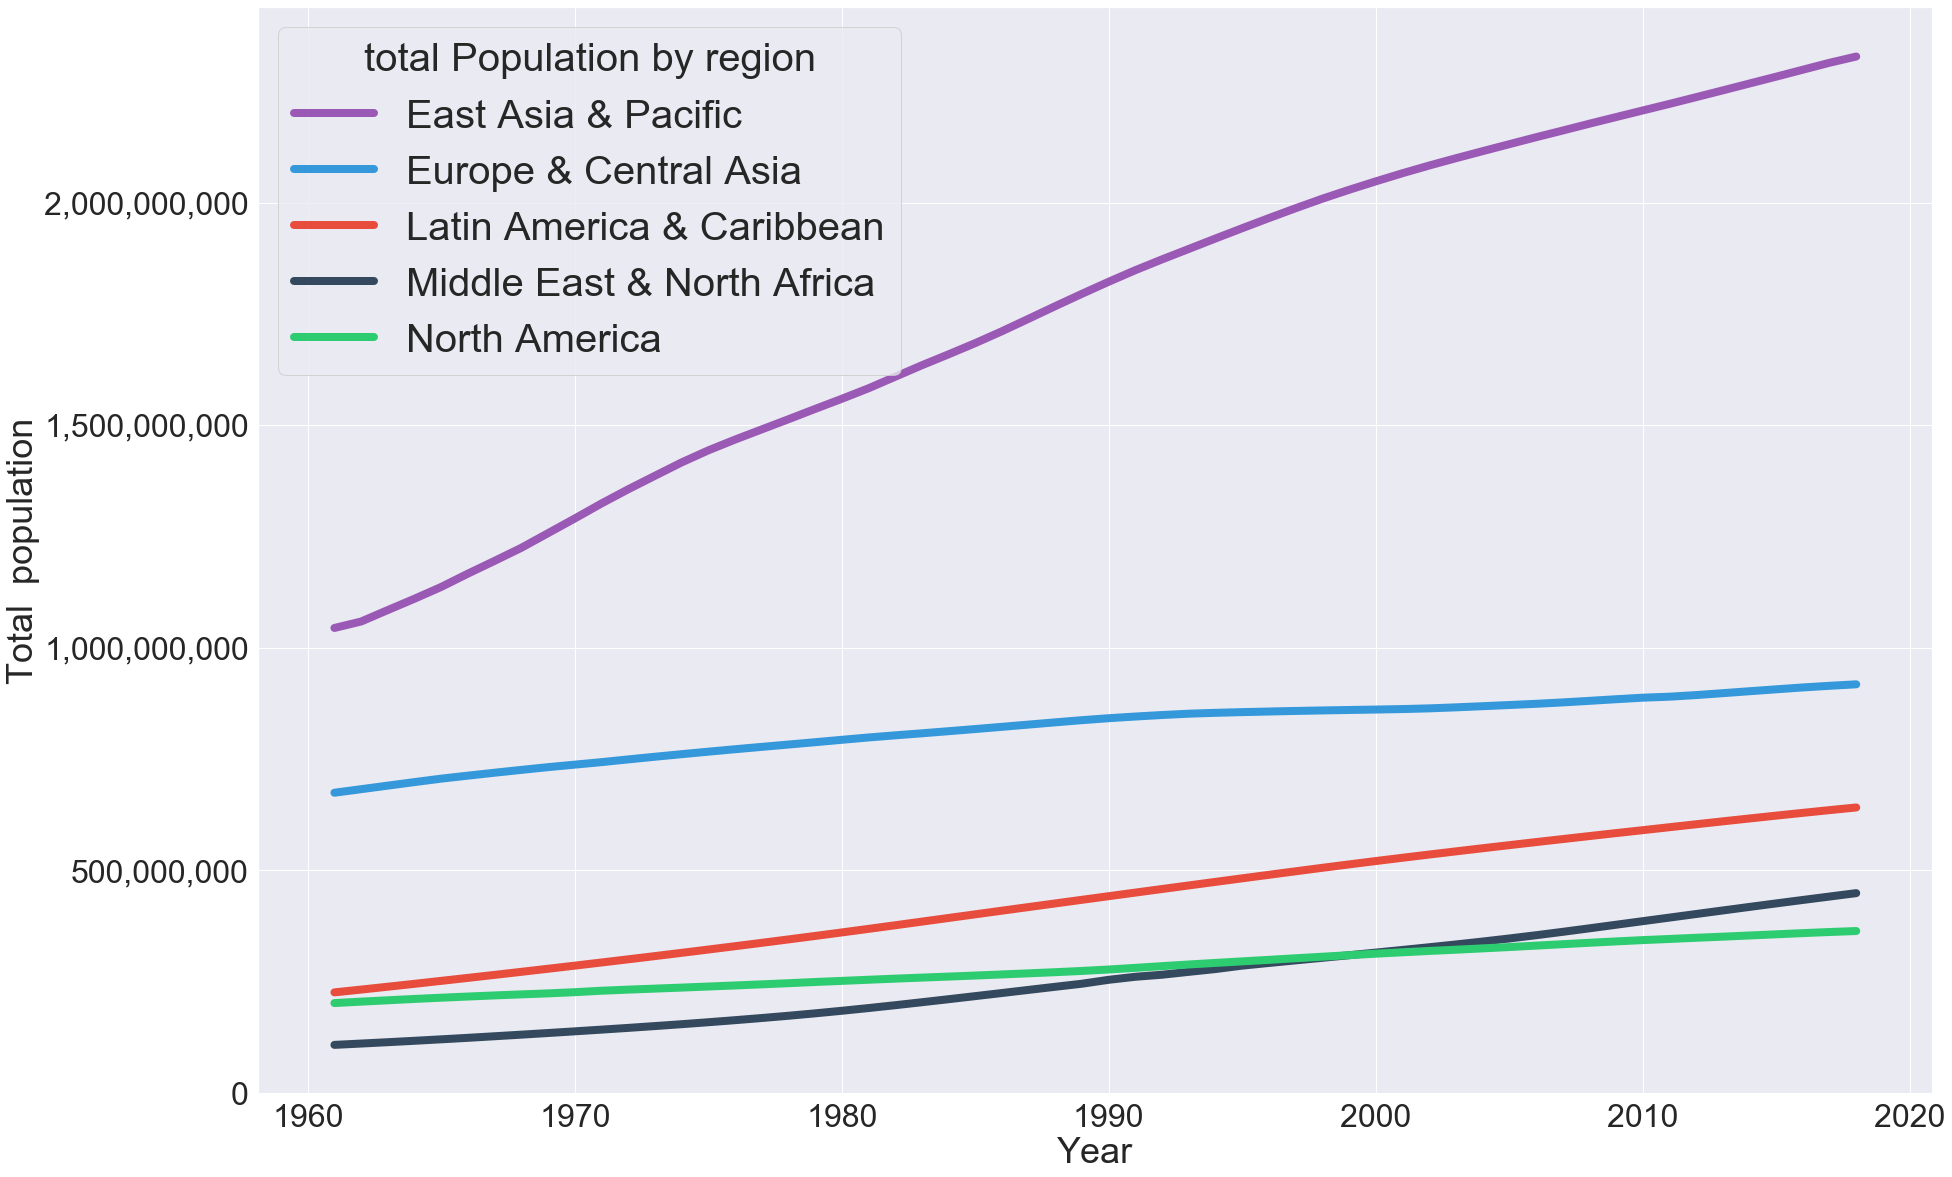

In [25]:
fig, ax = plt.subplots(figsize=(30,20))
WBOLDR3.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("total Population by region", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Total  population', fontsize=36)

## 2.A MEAN TOTAL COUNTRY

In [26]:
wb_old_pop2

,Country,b1961,b1962,b1963,b1964,b1965,b1966,b1967,b1968,b1969,...,b2009,b2010,b2011,b2012,b2013,b2014,b2015,b2016,b2017,b2018
0,Aruba,55438,56225,56695,57032,57360,57715,58055,58386,58726,...,101455,101669,102046,102560,103159,103774,104341,104872,105366,105845
1,Afghanistan,9169410,9351441,9543205,9744781,9956320,10174836,10399926,10637063,10893776,...,28394813,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386
2,Angola,5531472,5608539,5679458,5735044,5770570,5781214,5774243,5771652,5803254,...,22514281,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762
3,Albania,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,2081695,...,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376
4,Andorra,14375,15370,16412,17469,18549,19647,20758,21890,23058,...,84463,84449,83747,82427,80774,79213,78011,77297,77001,77006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Kosovo,966000,994000,1022000,1050000,1078000,1106000,1135000,1163000,1191000,...,1761474,1775680,1791000,1805200,1824100,1821800,1801800,1816200,1830700,1845300
254,"Yemen, Rep.",5393036,5473671,5556766,5641597,5727751,5816247,5907874,6001852,6097035,...,22516460,23154855,23807588,24473178,25147109,25823485,26497889,27168210,27834821,28498687
255,South Africa,17524533,17965725,18423161,18896307,19384841,19888250,20406864,20942145,21496075,...,50477011,51216964,52004172,52834005,53689236,54545991,55386367,56203654,57000451,57779622
256,Zambia,3164329,3260650,3360104,3463213,3570464,3681955,3797873,3918872,4045740,...,13215139,13605984,14023193,14465121,14926504,15399753,15879361,16363507,16853688,17351822


In [27]:
ww = pd.wide_to_long(wb_old_pop2, ['b'], i='Country', j='year').reset_index()
ww

,Country,year,b
0,Aruba,1961,55438
1,Afghanistan,1961,9169410
2,Angola,1961,5531472
3,Albania,1961,1659800
4,Andorra,1961,14375
...,...,...,...
14959,Kosovo,2018,1845300
14960,"Yemen, Rep.",2018,28498687
14961,South Africa,2018,57779622
14962,Zambia,2018,17351822


In [28]:
ww = ww.pivot_table(index='year',columns='Country',values='b',aggfunc='sum')
ww

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),World,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1961,9169410,1659800,11336339,20602,14375,5531472,55001,94724510,20817266,1941492,...,2571681,8813616,65705,8439261,33666110,34300,3072565230,5393036,3164329,3905034
1962,9351441,1711319,11619828,21253,15370,5608539,55841,97334442,21153052,2009526,...,2603882,9113620,67794,8742777,34683407,35000,3125542316,5473671,3260650,4039201
1963,9543205,1762621,11912803,22034,16412,5679458,56702,100034179,21488912,2077578,...,2635126,9428906,69946,9052635,35721217,39800,3190651098,5556766,3360104,4178726
1964,9744781,1814135,12221675,22854,17469,5735044,57641,102832760,21824425,2145001,...,2665388,9762816,72115,9369096,36779999,40800,3256154512,5641597,3463213,4322861
1965,9956320,1864791,12550885,23672,18549,5770570,58698,105736431,22159650,2211319,...,2694536,10116870,74270,9692278,37858951,43500,3323068099,5727751,3570464,4471177
1966,10174836,1914573,12902627,24462,19647,5781214,59915,108758610,22494035,2276034,...,2722875,10493436,76395,10022592,38958048,46200,3393134164,5816247,3681955,4623351
1967,10399926,1965598,13275026,25248,20758,5774243,61241,111899364,22828869,2339127,...,2750086,10889509,78499,10359745,40072948,49100,3462573375,5907874,3797873,4779827
1968,10637063,2022272,13663583,25989,21890,5771652,62521,115136178,23168267,2401143,...,2774759,11294672,80657,10702291,41193601,55700,3532954374,6001852,3918872,4941906
1969,10893776,2081695,14061722,26703,23058,5803254,63550,118437195,23517611,2462928,...,2795042,11694847,82927,11048262,42307146,60300,3607645403,6097035,4045740,5111337


In [29]:
ww['TOTAL COUNTRY']=ww[:].mean(axis=1,skipna='true')
ww

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),World,"Yemen, Rep.",Zambia,Zimbabwe,TOTAL COUNTRY
year,,,,,,,,,,,,,,,,,,,,,
1961,9169410,1659800,11336339,20602,14375,5531472,55001,94724510,20817266,1941492,...,8813616,65705,8439261,33666110,34300,3072565230,5393036,3164329,3905034,1.205577e+08
1962,9351441,1711319,11619828,21253,15370,5608539,55841,97334442,21153052,2009526,...,9113620,67794,8742777,34683407,35000,3125542316,5473671,3260650,4039201,1.226916e+08
1963,9543205,1762621,11912803,22034,16412,5679458,56702,100034179,21488912,2077578,...,9428906,69946,9052635,35721217,39800,3190651098,5556766,3360104,4178726,1.253475e+08
1964,9744781,1814135,12221675,22854,17469,5735044,57641,102832760,21824425,2145001,...,9762816,72115,9369096,36779999,40800,3256154512,5641597,3463213,4322861,1.280242e+08
1965,9956320,1864791,12550885,23672,18549,5770570,58698,105736431,22159650,2211319,...,10116870,74270,9692278,37858951,43500,3323068099,5727751,3570464,4471177,1.307670e+08
1966,10174836,1914573,12902627,24462,19647,5781214,59915,108758610,22494035,2276034,...,10493436,76395,10022592,38958048,46200,3393134164,5816247,3681955,4623351,1.336556e+08
1967,10399926,1965598,13275026,25248,20758,5774243,61241,111899364,22828869,2339127,...,10889509,78499,10359745,40072948,49100,3462573375,5907874,3797873,4779827,1.365349e+08
1968,10637063,2022272,13663583,25989,21890,5771652,62521,115136178,23168267,2401143,...,11294672,80657,10702291,41193601,55700,3532954374,6001852,3918872,4941906,1.394672e+08
1969,10893776,2081695,14061722,26703,23058,5803254,63550,118437195,23517611,2462928,...,11694847,82927,11048262,42307146,60300,3607645403,6097035,4045740,5111337,1.425444e+08


In [30]:
WW2 = ww[['TOTAL COUNTRY']]
WW2

Country,TOTAL COUNTRY
year,
1961,1.205577e+08
1962,1.226916e+08
1963,1.253475e+08
1964,1.280242e+08
1965,1.307670e+08
1966,1.336556e+08
1967,1.365349e+08
1968,1.394672e+08
1969,1.425444e+08


## graph by TOTAL COUNTRY

Text(0, 0.5, 'MEAN Total  population')

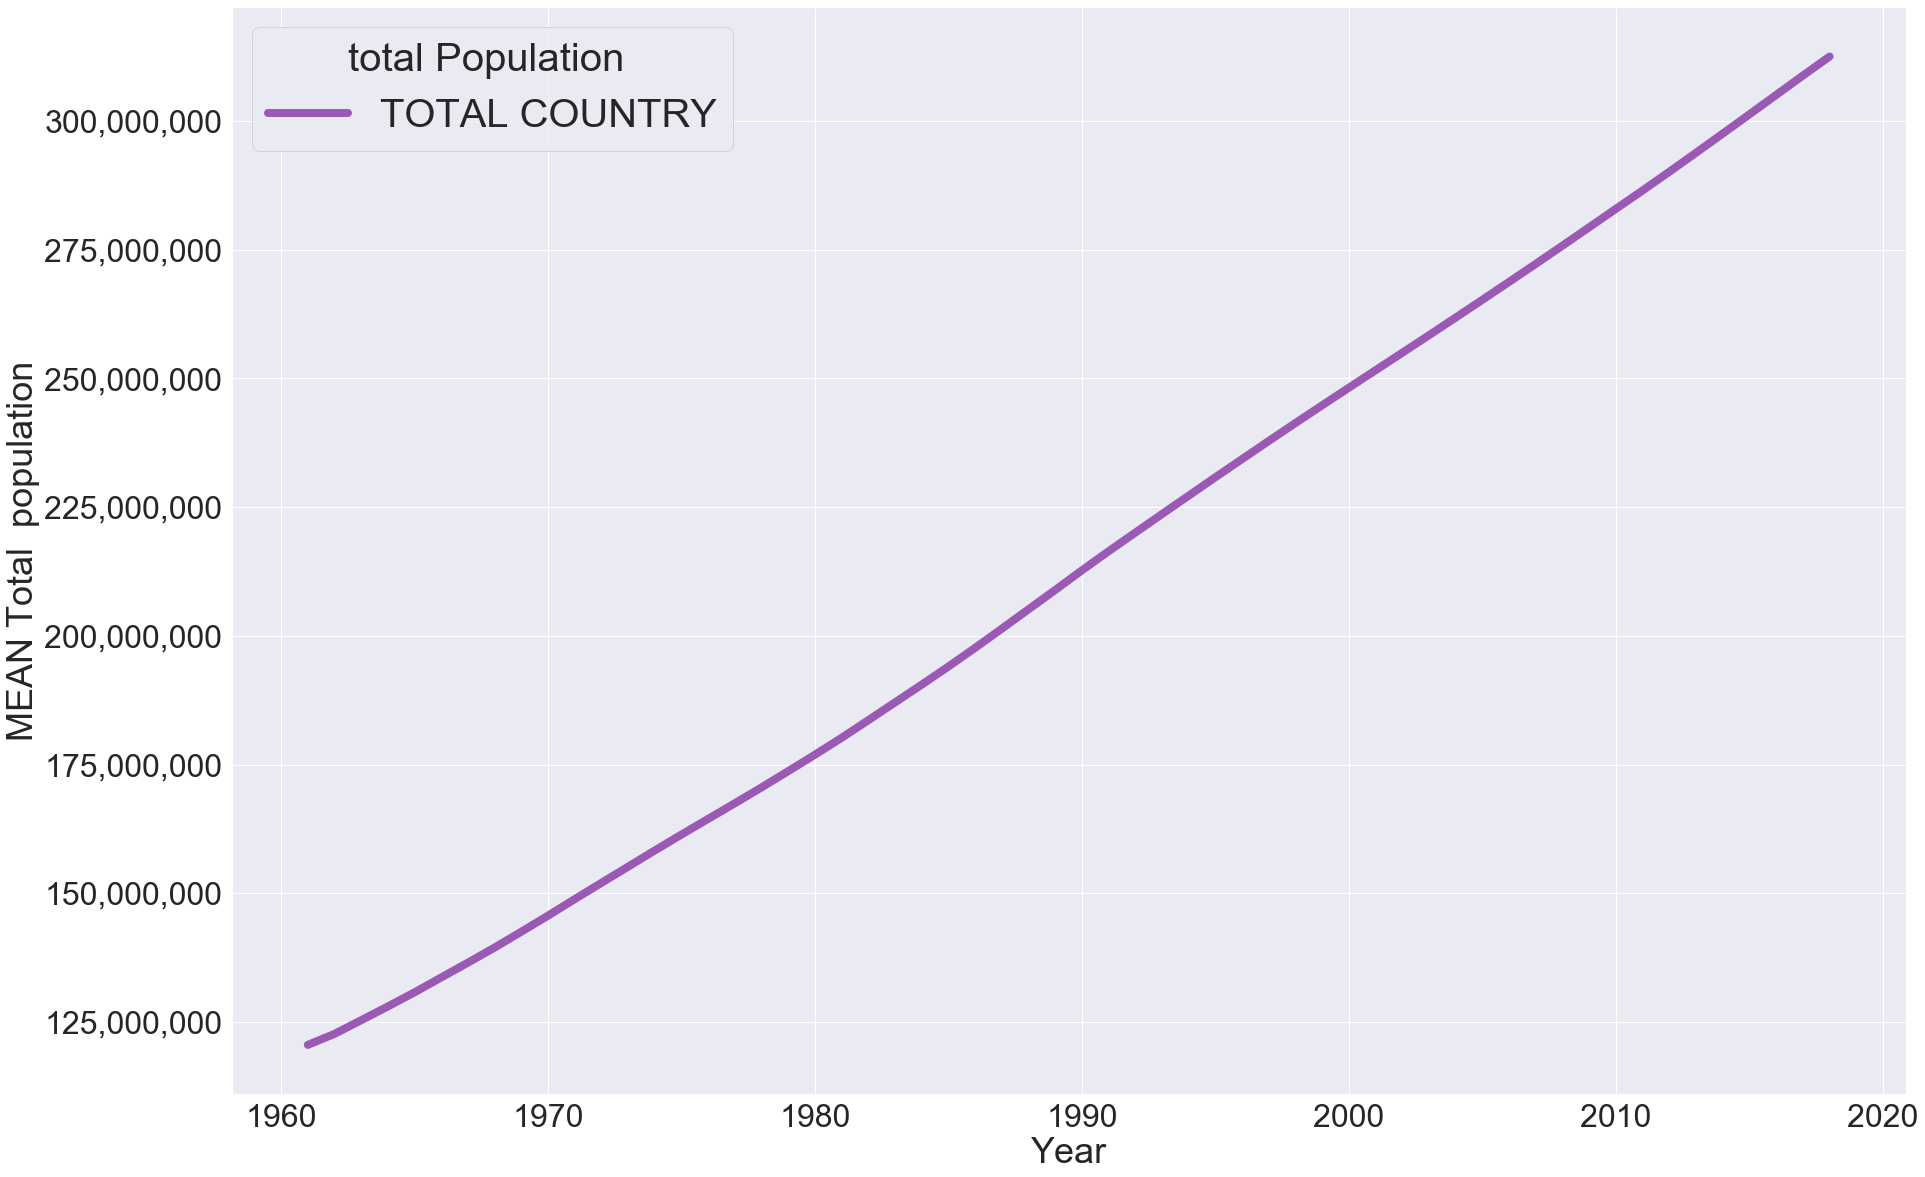

In [42]:
fig, ax = plt.subplots(figsize=(30,20))
WW2.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("total Population ", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('MEAN Total  population', fontsize=36)

## 3 POINT



In [32]:
if not os.path.exists(pathout + 'FERT.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'FERT.xls')

In [71]:
FER = pd.read_excel(pathout + 'FERT.xls', sheet_name="Data", skiprows=3)


In [72]:
FER2=FER.drop(FER.columns[[1, 2, 3, 4,]], axis='columns')


In [35]:
FER2= FER2[[col for col in FER2.columns if str(col).startswith('2019')==False]]


In [39]:
FER2.rename(columns={'Country Name': 'Country', }, inplace=True)



/Users/nicolasurrego/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
FER2.columns = ['Country'] + ['b_'+str(col) for col in FER2.columns[1:]]

In [38]:
FER2

,Country,b_1961,b_1962,b_1963,b_1964,b_1965,b_1966,b_1967,b_1968,b_1969,...,b_2009,b_2010,b_2011,b_2012,b_2013,b_2014,b_2015,b_2016,b_2017,b_2018
0,Aruba,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896
1,Afghanistan,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473
2,Angola,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,7.388,...,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519
3,Albania,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,5.057,...,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.340,2.290,2.240,2.190,2.160,2.130,2.090,2.060,2.020,2.000
260,"Yemen, Rep.",7.962,7.991,8.026,8.067,8.114,8.166,8.222,8.278,8.334,...,4.801,4.674,4.554,4.439,4.326,4.214,4.103,3.994,3.890,3.792
261,South Africa,6.028,6.010,5.986,5.956,5.920,5.878,5.832,5.782,5.728,...,2.608,2.598,2.582,2.561,2.537,2.511,2.484,2.457,2.430,2.405
262,Zambia,7.169,7.214,7.249,7.274,7.291,7.304,7.317,7.332,7.349,...,5.496,5.415,5.328,5.233,5.132,5.026,4.918,4.814,4.718,4.633


In [40]:
FER3 = pd.wide_to_long(FER2, ['b_'], i='Country', j='year').reset_index()


In [63]:
FER3['TOTAL COUNTRY FER']=FER3[:].mean(axis=1,skipna='true')

In [75]:
FER4 = FER3[['TOTAL COUNTRY FER']]



Text(0, 0.5, 'MEAN Total  population FER')

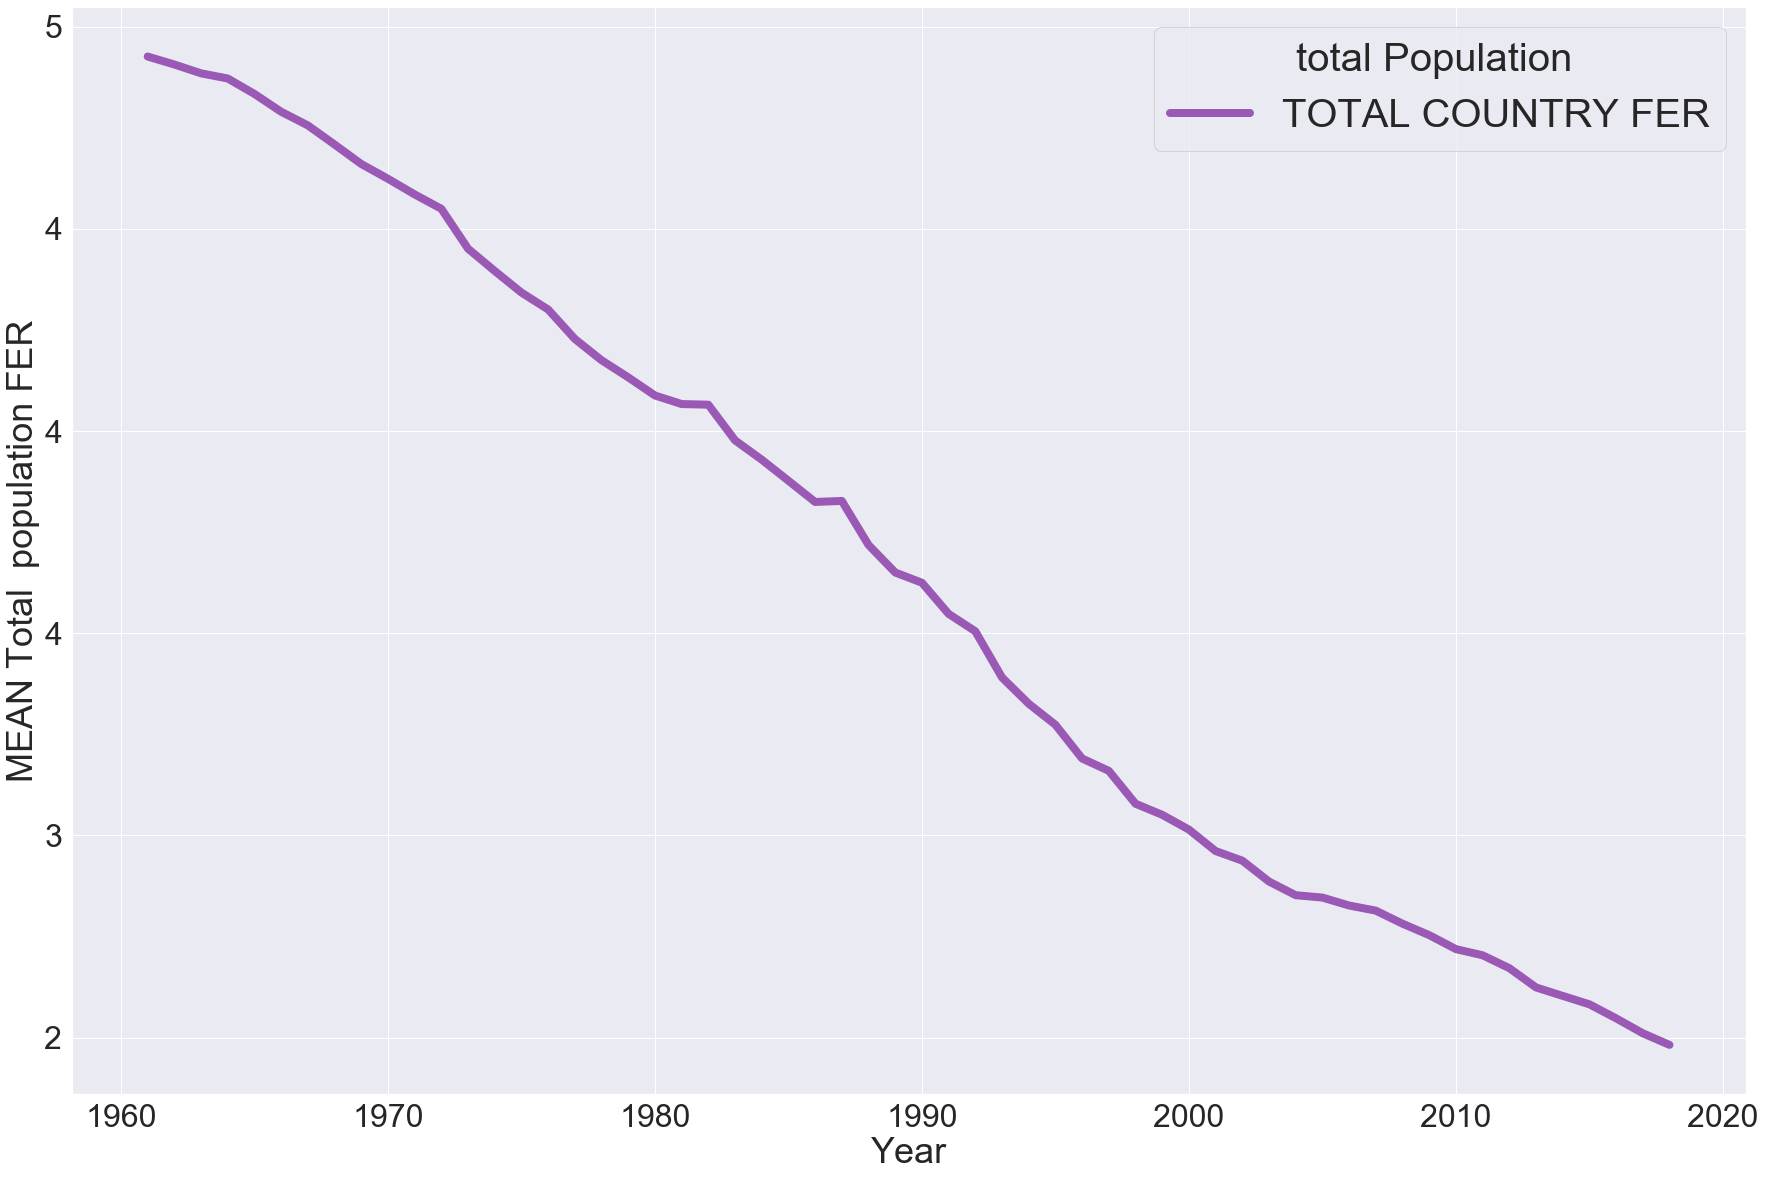

In [66]:
fig, ax = plt.subplots(figsize=(30,20))
FER4.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("total Population ", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('MEAN Total  population FER', fontsize=36)

In [69]:
if not os.path.exists(pathout + 'DEATH.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.CDRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'DEATH.xls')

In [70]:
DE = pd.read_excel(pathout + 'DEATH.xls', sheet_name="Data", skiprows=3)
DE

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,6.388,6.241,6.118,6.012,5.920,5.839,...,7.918,8.061,8.205,8.347,8.488,8.627,8.765,8.907,9.053,NaN
1,Afghanistan,AFG,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,32.219,31.649,31.093,30.551,30.022,29.501,...,8.250,7.936,7.645,7.380,7.141,6.929,6.742,6.575,6.423,NaN
2,Angola,AGO,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,27.097,26.859,26.627,26.407,26.194,25.966,...,11.680,11.039,10.451,9.921,9.454,9.052,8.716,8.432,8.190,NaN
3,Albania,ALB,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,11.326,10.719,10.175,9.707,9.320,9.009,...,6.841,6.915,6.996,7.096,7.219,7.367,7.534,7.714,7.898,NaN
4,Andorra,AND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800,NaN,3.900,NaN,NaN,NaN,4.300,NaN,4.400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.100,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,NaN
260,"Yemen, Rep.",YEM,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,36.234,36.031,35.732,35.321,34.790,34.136,...,6.189,6.094,6.030,5.992,5.974,5.969,5.972,5.978,5.983,NaN
261,South Africa,ZAF,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,17.398,17.104,16.816,16.527,16.233,15.930,...,12.085,11.483,10.918,10.430,10.044,9.769,9.599,9.498,9.435,NaN
262,Zambia,ZMB,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,18.471,18.191,17.931,17.689,17.462,17.241,...,10.051,9.304,8.637,8.055,7.565,7.169,6.864,6.633,6.456,NaN


In [74]:
DE=DE.drop(DE.columns[[1, 2, 3, 4,]], axis='columns')
DE

,Country Name,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,5.839,5.770,5.716,5.682,5.666,5.671,5.698,5.746,5.812,...,7.918,8.061,8.205,8.347,8.488,8.627,8.765,8.907,9.053,NaN
1,Afghanistan,29.501,28.985,28.468,27.946,27.418,26.880,26.334,25.781,25.222,...,8.250,7.936,7.645,7.380,7.141,6.929,6.742,6.575,6.423,NaN
2,Angola,25.966,25.690,25.342,24.916,24.418,23.872,23.312,22.777,22.296,...,11.680,11.039,10.451,9.921,9.454,9.052,8.716,8.432,8.190,NaN
3,Albania,9.009,8.762,8.555,8.366,8.184,7.996,7.798,7.591,7.382,...,6.841,6.915,6.996,7.096,7.219,7.367,7.534,7.714,7.898,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800,NaN,3.900,NaN,NaN,NaN,4.300,NaN,4.400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.100,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,NaN
260,"Yemen, Rep.",34.136,33.365,32.500,31.563,30.572,29.540,28.478,27.390,26.287,...,6.189,6.094,6.030,5.992,5.974,5.969,5.972,5.978,5.983,NaN
261,South Africa,15.930,15.614,15.287,14.952,14.609,14.255,13.892,13.522,13.147,...,12.085,11.483,10.918,10.430,10.044,9.769,9.599,9.498,9.435,NaN
262,Zambia,17.241,17.012,16.768,16.504,16.220,15.919,15.610,15.305,15.017,...,10.051,9.304,8.637,8.055,7.565,7.169,6.864,6.633,6.456,NaN


In [76]:
DE1= DE[[col for col in DE.columns if str(col).startswith('2019')==False]]

In [77]:
DE1.rename(columns={'Country Name': 'Country', }, inplace=True)

/Users/nicolasurrego/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
DE1.columns = ['Country'] + ['D_'+str(col) for col in DE1.columns[1:]]

In [80]:
DE1

,Country,D_1965,D_1966,D_1967,D_1968,D_1969,D_1970,D_1971,D_1972,D_1973,...,D_2009,D_2010,D_2011,D_2012,D_2013,D_2014,D_2015,D_2016,D_2017,D_2018
0,Aruba,5.839,5.770,5.716,5.682,5.666,5.671,5.698,5.746,5.812,...,7.780,7.918,8.061,8.205,8.347,8.488,8.627,8.765,8.907,9.053
1,Afghanistan,29.501,28.985,28.468,27.946,27.418,26.880,26.334,25.781,25.222,...,8.584,8.250,7.936,7.645,7.380,7.141,6.929,6.742,6.575,6.423
2,Angola,25.966,25.690,25.342,24.916,24.418,23.872,23.312,22.777,22.296,...,12.367,11.680,11.039,10.451,9.921,9.454,9.052,8.716,8.432,8.190
3,Albania,9.009,8.762,8.555,8.366,8.184,7.996,7.798,7.591,7.382,...,6.756,6.841,6.915,6.996,7.096,7.219,7.367,7.534,7.714,7.898
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.200,2.800,NaN,3.900,NaN,NaN,NaN,4.300,NaN,4.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.000,7.100,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000
260,"Yemen, Rep.",34.136,33.365,32.500,31.563,30.572,29.540,28.478,27.390,26.287,...,6.320,6.189,6.094,6.030,5.992,5.974,5.969,5.972,5.978,5.983
261,South Africa,15.930,15.614,15.287,14.952,14.609,14.255,13.892,13.522,13.147,...,12.677,12.085,11.483,10.918,10.430,10.044,9.769,9.599,9.498,9.435
262,Zambia,17.241,17.012,16.768,16.504,16.220,15.919,15.610,15.305,15.017,...,10.869,10.051,9.304,8.637,8.055,7.565,7.169,6.864,6.633,6.456


In [82]:
DE1 = pd.wide_to_long(DE1, ['D_'], i='Country', j='year').reset_index()

In [84]:
DE2 = DE1.pivot_table(index='year',columns='Country',values='D_',aggfunc='sum')
DE2

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1965,29.501,9.009,18.383,0.0,0.0,25.966,8.226,17.796667,8.871,7.609,...,11.974000,13.760,8.066,10.326,8.400000,0.000,13.205631,34.136,17.241,12.760
1966,28.985,8.762,18.005,0.0,0.0,25.690,7.978,17.335919,8.917,7.242,...,11.625000,13.333,7.809,10.259,8.088889,0.000,12.863195,33.365,17.012,12.458
1967,28.468,8.555,17.646,0.0,0.0,25.342,7.761,16.886040,8.950,6.910,...,11.292000,12.938,7.553,10.381,7.777778,0.000,12.600419,32.500,16.768,12.183
1968,27.946,8.366,17.304,0.0,0.0,24.916,7.581,16.448101,8.969,6.623,...,10.986000,12.578,7.298,10.673,7.466667,0.000,12.459614,31.563,16.504,11.937
1969,27.418,8.184,16.975,0.0,0.0,24.418,7.438,16.019212,8.976,6.385,...,10.710000,12.253,7.046,11.087,7.155556,0.000,12.266570,30.572,16.220,11.721
1970,26.880,7.996,16.653,0.0,0.0,23.872,7.326,15.594121,8.970,6.203,...,10.469000,11.957,6.801,11.512,6.844444,0.000,11.992593,29.540,15.919,11.537
1971,26.334,7.798,16.331,0.0,0.0,23.312,7.238,15.166220,8.957,6.081,...,10.263000,11.680,6.571,11.807,6.533333,0.000,11.757138,28.478,15.610,11.388
1972,25.781,7.591,15.996,0.0,0.0,22.777,7.162,14.731155,8.941,6.012,...,10.084000,11.408,6.363,11.867,6.222222,0.000,11.662497,27.390,15.305,11.265
1973,25.222,7.382,15.633,0.0,0.0,22.296,7.091,14.290049,8.924,5.988,...,9.924000,11.130,6.179,11.637,5.911111,0.000,11.418556,26.287,15.017,11.159


In [85]:
DE2['TOTAL COUNTRY FER']=DE2[:].mean(axis=1,skipna='true')

In [86]:
DE3 = DE2[['TOTAL COUNTRY FER']]

Text(0, 0.5, 'MEAN Total  population DEATH')

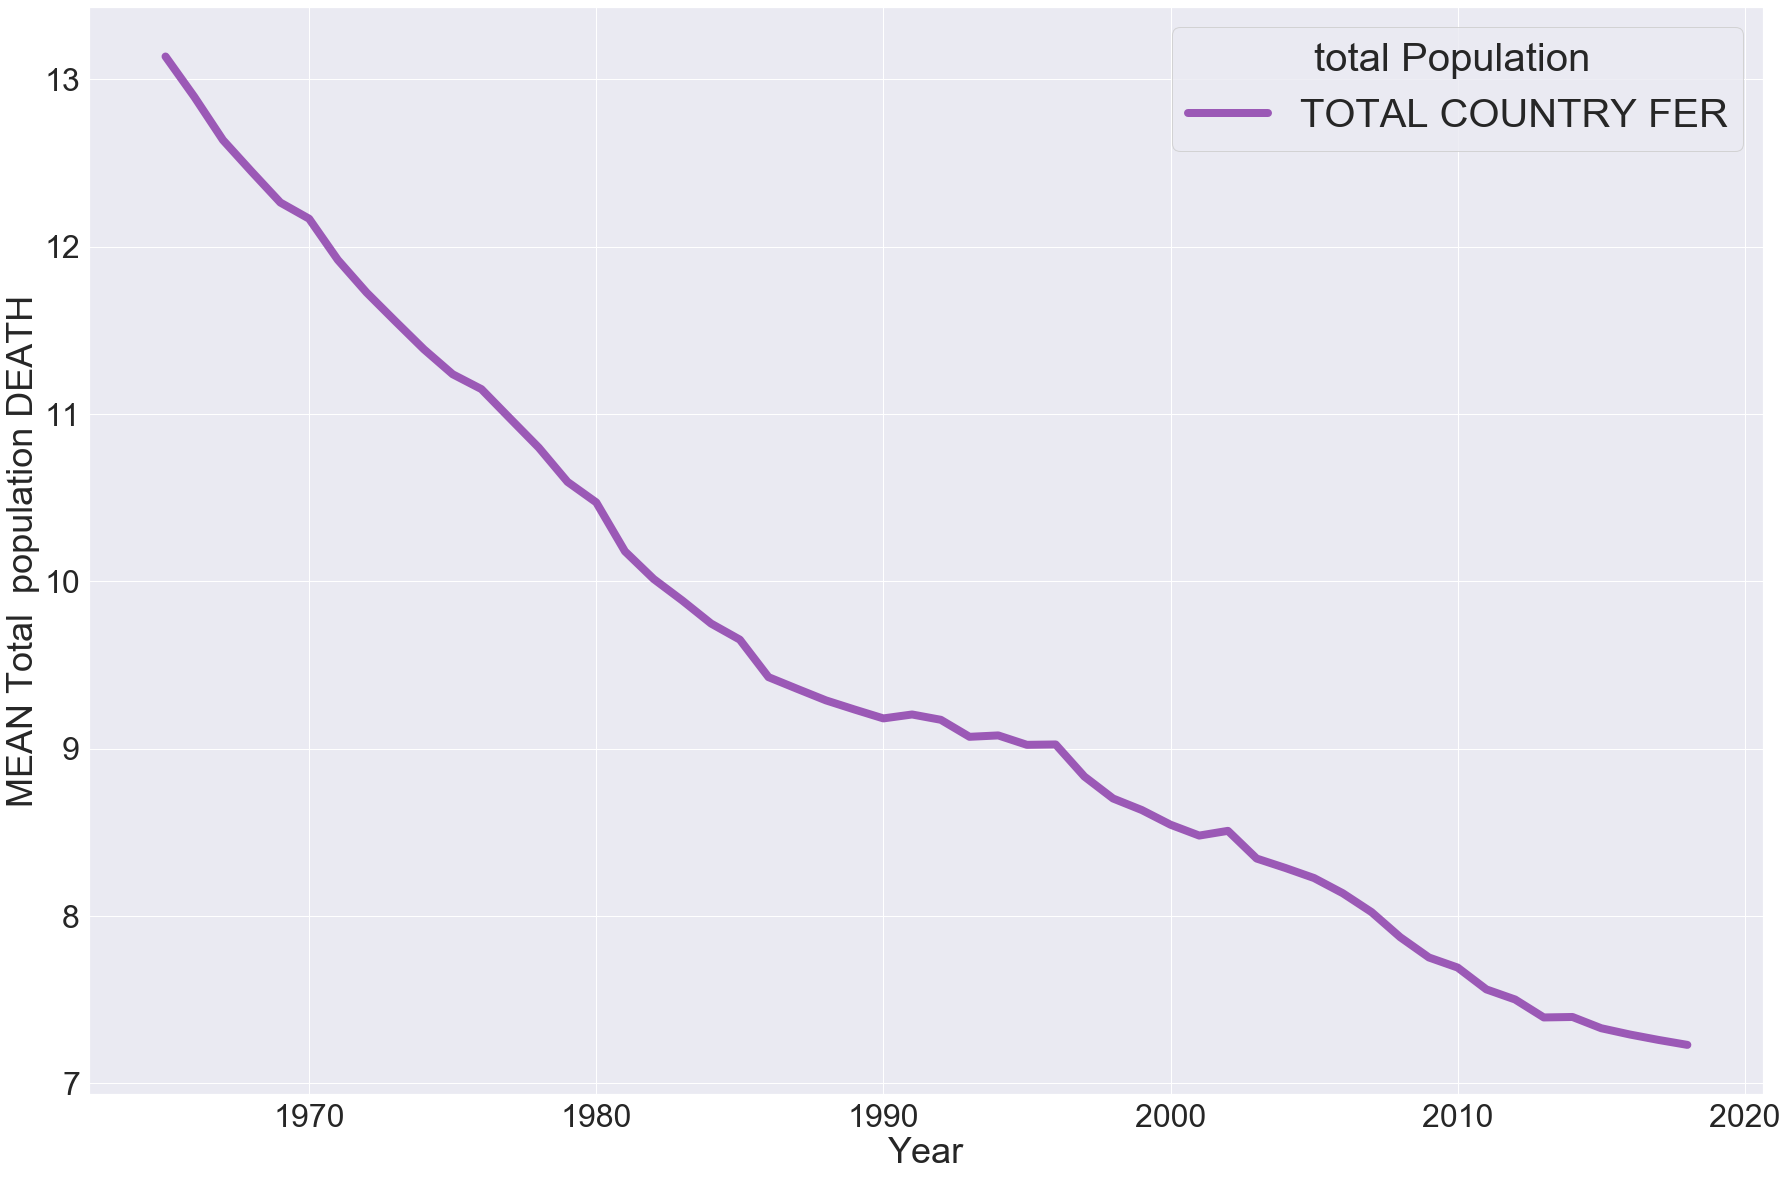

In [88]:
fig, ax = plt.subplots(figsize=(30,20))
DE3.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("total Population ", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('MEAN Total  population DEATH', fontsize=36)

In [89]:
if not os.path.exists(pathout + 'LIFE.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'LIFE.xls')

In [90]:
LI = pd.read_excel(pathout + 'LIFE.xls', sheet_name="Data", skiprows=3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.017,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.028,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,55.350,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.562,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,72.195122,NaN
260,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919,30.163,30.500,30.943,31.501,32.175,...,65.549,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,NaN
261,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406,48.777,49.142,49.509,49.888,50.284,...,57.669,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,NaN
262,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687,47.084,47.446,47.772,48.068,48.351,...,55.655,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,NaN


In [92]:
LI1=LI.drop(FER.columns[[1, 2, 3, 4,]], axis='columns')

In [93]:
LI1= LI1[[col for col in DE.columns if str(col).startswith('2019')==False]]

In [94]:
LI1.rename(columns={'Country Name': 'Country', }, inplace=True)

In [95]:
LI1.columns = ['Country'] + ['D_'+str(col) for col in LI1.columns[1:]]

In [97]:
LI1

,Country,D_1965,D_1966,D_1967,D_1968,D_1969,D_1970,D_1971,D_1972,D_1973,...,D_2009,D_2010,D_2011,D_2012,D_2013,D_2014,D_2015,D_2016,D_2017,D_2018
0,Aruba,67.435,67.762,68.095,68.436,68.784,69.140,69.498,69.851,70.191,...,74.87200,75.017,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000
1,Afghanistan,34.948,35.430,35.914,36.403,36.900,37.409,37.930,38.461,39.003,...,60.48400,61.028,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000
2,Angola,39.102,39.454,39.813,40.178,40.546,40.914,41.282,41.650,42.016,...,54.31100,55.350,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000
3,Albania,65.850,66.110,66.304,66.487,66.689,66.935,67.237,67.582,67.953,...,76.22100,76.562,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.64878,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,72.195122
260,"Yemen, Rep.",32.175,32.960,33.836,34.780,35.780,36.820,37.888,38.981,40.093,...,65.25500,65.549,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000
261,South Africa,50.284,50.705,51.148,51.615,52.106,52.620,53.157,53.713,54.281,...,56.46000,57.669,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000
262,Zambia,48.351,48.643,48.960,49.313,49.700,50.114,50.542,50.961,51.351,...,54.13000,55.655,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000


In [98]:
LI1 = pd.wide_to_long(LI1, ['D_'], i='Country', j='year').reset_index()

In [101]:
LI2 = LI1.pivot_table(index='year',columns='Country',values='D_',aggfunc='sum')


In [106]:
LI2['TOTAL COUNTRY LIFE']=LI2[:].mean(axis=1,skipna='true')

In [107]:
LI2 = LI2[['TOTAL COUNTRY LIFE']]

In [108]:
LI3 = LI2[['TOTAL COUNTRY LIFE']]
LI3

Country,TOTAL COUNTRY LIFE
year,
1965,49.766543
1966,50.179602
1967,50.556228
1968,50.907472
1969,51.247898
1970,51.890904
1971,51.972746
1972,52.326790
1973,52.945072


Text(0, 0.5, 'MEAN Total  population ')

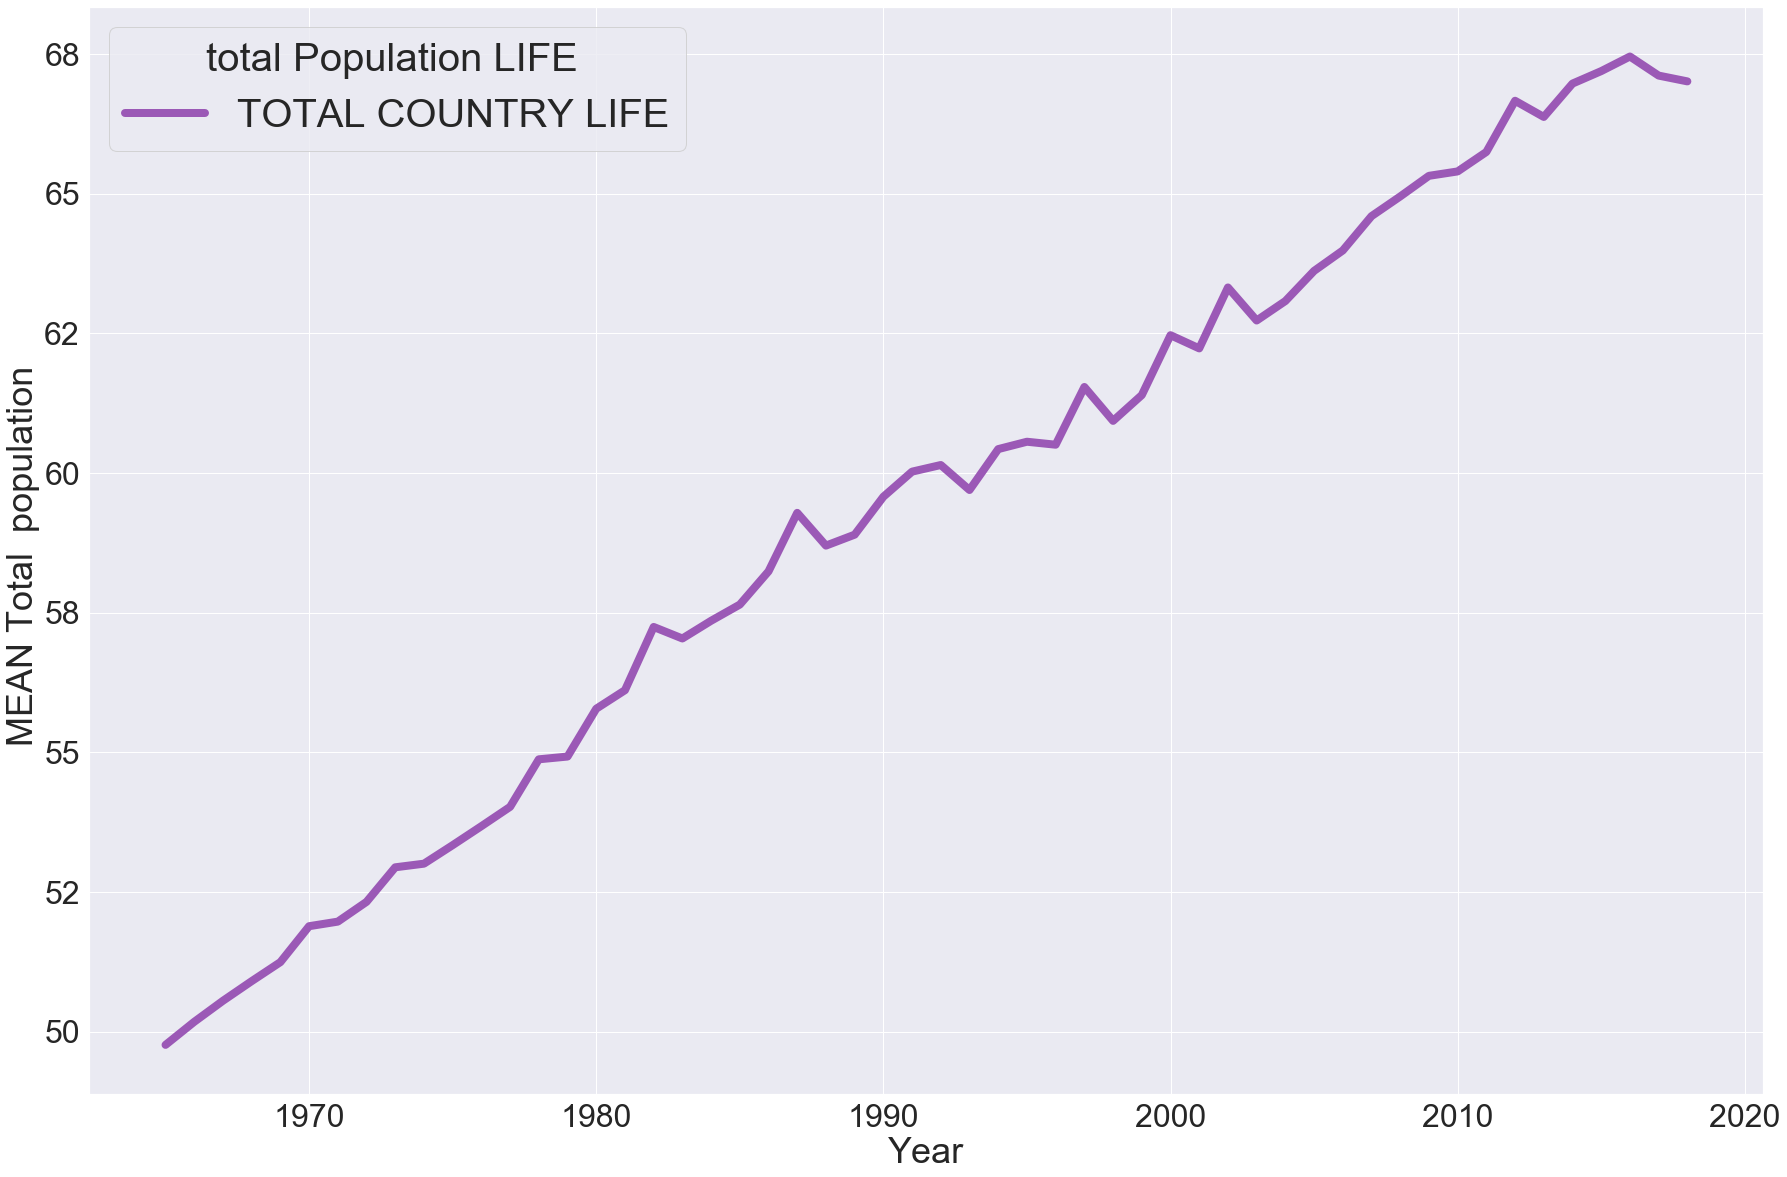

In [111]:
fig, ax = plt.subplots(figsize=(30,20))
LI3.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("total Population LIFE ", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('MEAN Total  population ', fontsize=36)

## 4 POINT

In [6]:

    data = np.recfromcsv('POL.E0per.txt')

NameError: name 'np' is not defined